In [1]:
%matplotlib ipympl

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.helpers import data_identifier, console_bold, present_float

In [5]:
plt.close('all')

In [177]:
data, headers = get_experiment_data(2735)
probe_repeats = len(data["transmissions"]) // headers["params"]["repeats"]

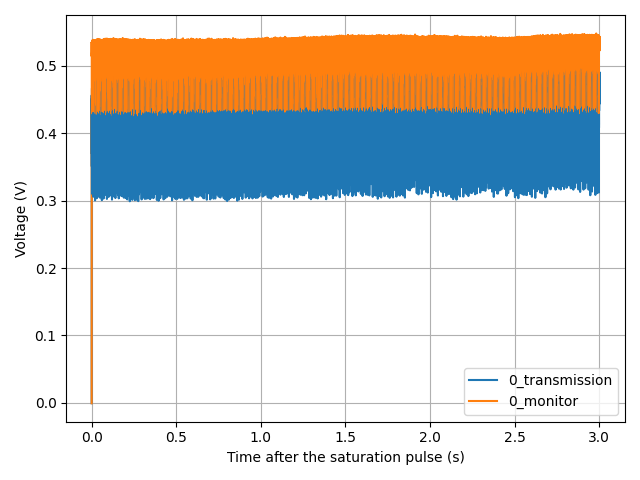

In [178]:
fig, ax = plt.subplots()
for kk in range(headers["params"]["repeats"]):
    if kk != 0:
        pass
    for ll in range(probe_repeats):
        index = kk * probe_repeats + ll
        if ll == 0:
            plot_kwargs_trans = {"label": f"{kk}_transmission"}
            plot_kwargs_monitors = {"label": f"{kk}_monitor"}
        else:
            plot_kwargs_trans = {}
            plot_kwargs_monitors = {}
        ax.plot(data["times"] + ll * 0.005005, data["transmissions"][index], color=f"C{kk*2}", **plot_kwargs_trans)
        ax.plot(data["times"] + ll * 0.005005, data["monitors"][index], color=f"C{kk*2+1}", **plot_kwargs_monitors)
ax.grid()
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Time after the saturation pulse (s)")
#ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()

In [179]:
all_ratios = data["transmissions"] / data["monitors"]

In [180]:
all_ratios = []
for ll in range(len(data["transmissions"])):
    ratios = []
    transmissions = []
    monitors = []
    
    for kk in range(int(len(data["transmissions"][ll]) / 10)):
        transmissions.append(np.average(data["transmissions"][ll][kk * 10 + 1: kk * 10 + 5]))
        monitors.append(np.average(data["transmissions"][ll][kk * 10 + 6: kk * 10 + 10]))
        ratios.append(transmissions[-1] / monitors[-1])
    if ll == 1:
        print(monitors[:10])
        print(transmissions[:10])
        print(ratios[:10])
    all_ratios.append(ratios)
all_ratios = np.array(all_ratios)
times = np.average(data["times"].reshape(-1, 10), axis=1)

[0.45717529296875004, 0.44805541992187503, 0.45051940917968747, 0.456688232421875, 0.44347473144531246, 0.45197692871093753, 0.4466253662109375, 0.45551025390625, 0.448448486328125, 0.45209045410156246]
[0.42055725097656255, 0.46341491699218745, 0.46767700195312506, 0.4588763427734375, 0.4601953125, 0.4645343017578125, 0.46351196289062496, 0.4607904052734375, 0.46022033691406244, 0.45869812011718747]
[0.919903716243278, 1.034280351017717, 1.0380840257352695, 1.0047912562580354, 1.037703571069752, 1.0277832169059808, 1.0378093094508922, 1.0115917288840532, 1.026250173531245, 1.0146158052126015]


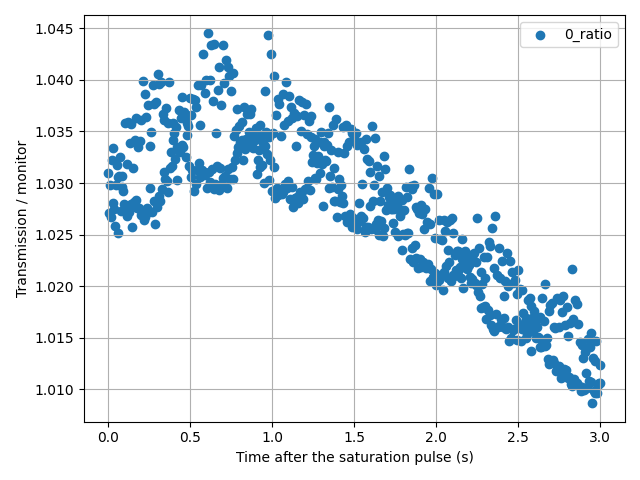

In [181]:
fig, ax = plt.subplots()
for kk in range(headers["params"]["repeats"]):
    for ll in range(probe_repeats):
        index = kk * probe_repeats + ll
        if ll == 0:
            ax.scatter(np.average(times + ll * 0.005005), np.average(all_ratios[index]), color=f"C{kk}", label=f"{kk}_ratio")
        else:
            ax.scatter(np.average(times + ll * 0.005005), np.average(all_ratios[index]), color=f"C{kk}")
ax.grid()
ax.set_ylabel("Transmission / monitor")
ax.set_xlabel("Time after the saturation pulse (s)")
#ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()